In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [2]:
titanic_df = pd.read_csv('titanic.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


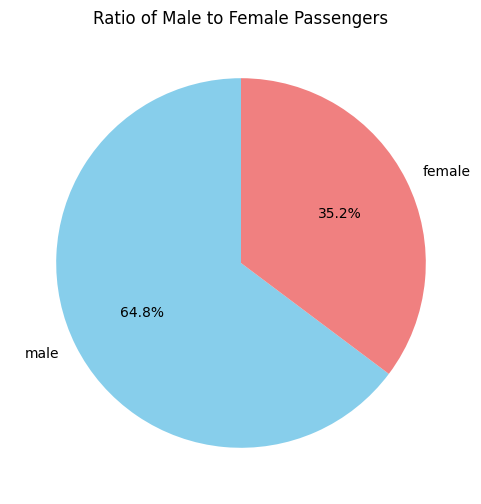

In [6]:
# pie chart
gender_counts = titanic_df['Sex'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Ratio of Male to Female Passengers')
plt.show()

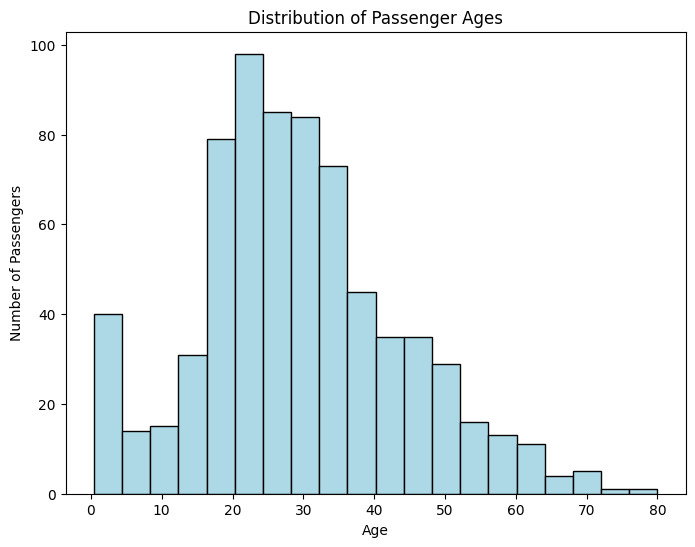

In [7]:
# histogram
plt.figure(figsize=(8, 6))
plt.hist(titanic_df['Age'].dropna(), bins=20, edgecolor='black', color='lightblue')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Distribution of Passenger Ages')
plt.show()

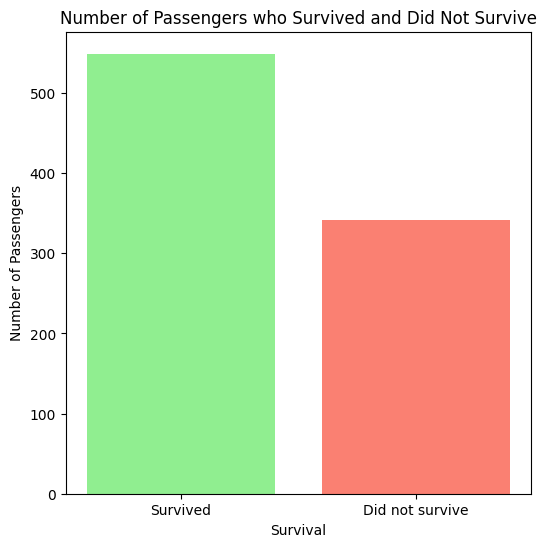

In [8]:
survived_counts = titanic_df['Survived'].value_counts()
plt.figure(figsize=(6, 6))
plt.bar(survived_counts.index, survived_counts.values, color=['lightgreen', 'salmon'])
plt.xticks(survived_counts.index, ['Survived', 'Did not survive'])
plt.xlabel('Survival')
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers who Survived and Did Not Survive')
plt.show()

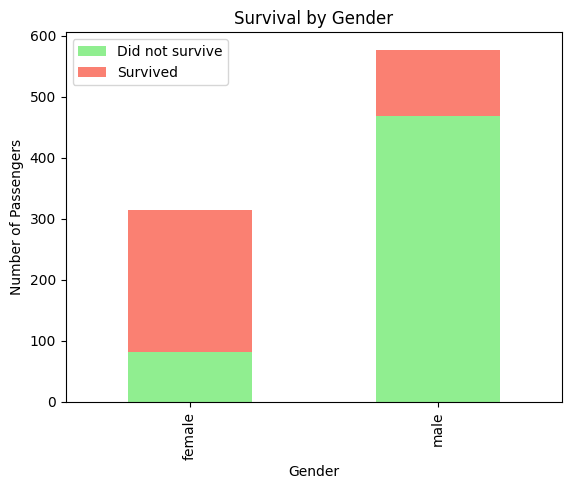

In [9]:
# stacked bar
survived_gender_counts = titanic_df.groupby(['Sex', 'Survived']).size().unstack()
survived_gender_counts.plot(kind='bar', stacked=True, color=['lightgreen', 'salmon'])
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.title('Survival by Gender')
plt.legend(['Did not survive', 'Survived'])
plt.show()

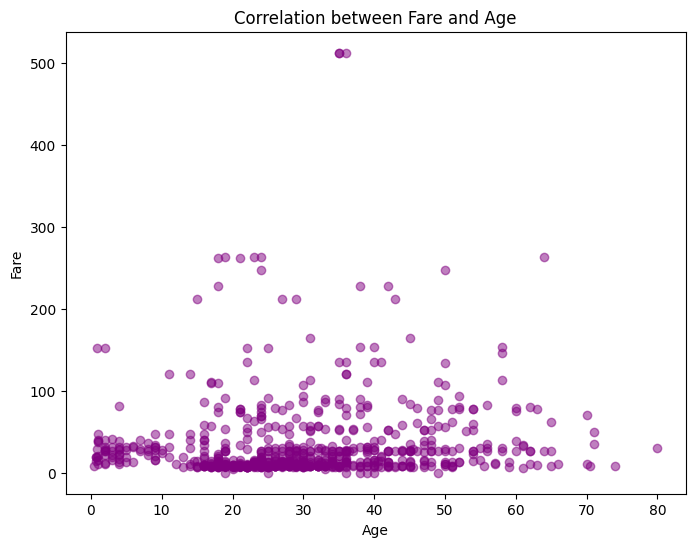

In [10]:
# scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(titanic_df['Age'], titanic_df['Fare'], alpha=0.5, color='purple')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Correlation between Fare and Age')
plt.show()

In [11]:
# Handle missing values in the 'Age' column by replacing them with the median age
# class sklearn.impute.SimpleImputer(*, missing_values=nan, strategy='mean', fill_value=None, copy=True, add_indicator=False, keep_empty_features=False)
imputer = SimpleImputer(strategy='median')
# use method fit_transform
titanic_df['Age'] = imputer.fit_transform(titanic_df[['Age']])
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
# Normalize the 'Fare' column using StandardScaler
scaler = StandardScaler()
titanic_df['Fare'] = scaler.fit_transform(titanic_df[['Fare']])
titanic_df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,-0.502445,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,0.786845,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,-0.488854,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,0.420730,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,-0.486337,NaN,S


In [13]:
# Convert the 'Sex' column into numerical representation using one-hot encoding
encoder = OneHotEncoder(drop='first', sparse_output=False)
sex_encoded = encoder.fit_transform(titanic_df[['Sex']])
sex_encoded_df = pd.DataFrame(sex_encoded, columns=['Male'])
titanic_df = pd.concat([titanic_df, sex_encoded_df], axis=1)

In [14]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Male'],
      dtype='object')

In [15]:
# Calculate the survival rate for different genders
gender_survival_rate = titanic_df.groupby('Sex')['Survived'].mean()
print("Survival Rate by Gender:")
print(gender_survival_rate)


Survival Rate by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [21]:
# Calculate the survival rate for different passenger classes
class_survival_rate = titanic_df.groupby('Pclass')['Survived'].mean()
print("\nSurvival Rate by Passenger Class:")
print(class_survival_rate)


Survival Rate by Passenger Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [20]:
# Identify the passenger with the highest fare
passenger_highest_fare = titanic_df.loc[titanic_df['Fare'].idxmax()]
print("\nPassenger with the Highest Fare:")
print(passenger_highest_fare)


Passenger with the Highest Fare:
PassengerId                 259
Survived                      1
Pclass                        1
Name           Ward, Miss. Anna
Age                        35.0
SibSp                         0
Parch                         0
Ticket                 PC 17755
Fare                   9.667167
Cabin                       NaN
Embarked                      C
Male                        0.0
Name: 258, dtype: object


In [19]:
titanic_new = titanic_df
titanic_new.drop(columns=['Sex'], inplace=True)
titanic_new.head()

KeyError: "['Sex'] not found in axis"